# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Simple Linear Regression
Linear regression is used to analyze the relationship between two variables, $y~x$, where $x$ is the independent variable and $y$ is the dependent variable.

In a deterministic model:

$$
    y = mx + b
$$

For a population, in a probabilistic model:

$$
    y = \beta_0 + \beta_1x + \epsilon
$$

$\beta_0$: population y-intercept of the line.  
$\beta_1$: population slope of the line.  
$\epsilon$: random error component.

For a sample:

$$
    y = b_0 + b_1x + e_i
$$

### Model development
1. Hypothesize the deterministic component of the model that relates the mean, $E(y|x)$ to the independent variable $x$.

$$
    E(y|x) = \beta_0 + \beta_1x
$$

1. Use sample data to estimate unknown model parameters: $\hat{\beta_0}$ or $b_0$, and $\hat{\beta_1}$ or $b_1$.
1. Specify the probability distribution of the random error term and estimate SD of the distribution.  
    $\epsilon_i~N(0,\sigma)$  
   This means that the residual error are assumed to follow a standard normal distribution.
1. Statistically evaluate the usefulness of the model.
1. Use model for prediction, estimation or other purposes.

### Assumptions of Linear Regression
Check before modeling:
- A Linear relationship between the dependent (target) and independent (features) variables.
- No Multicollinearity: The independent variable does not have a strong correlation with other variables in the dataset.

Check after modeling:
- Homoscedasticity: Error is independent and random.
- Residual- Measured error terms are normally distributed. This can be assured with enough data points thanks to the Central Limit Theorum.

### Scatterplot

In [2]:
gas_prices = pd.read_csv('./data/gas_prices.csv', index_col='Year')
gas_prices.head()

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


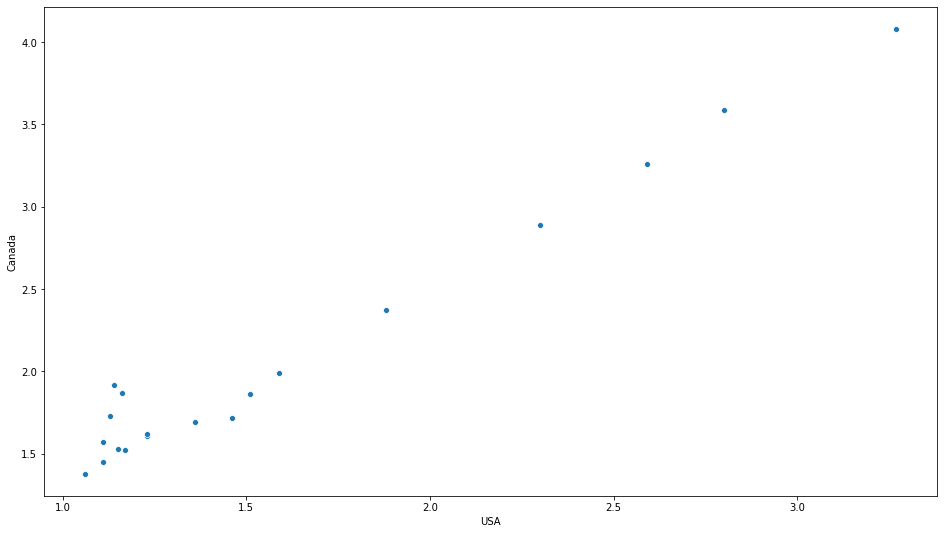

In [3]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=gas_prices, x='USA', y='Canada')
plt.show()

### Linear Model Plot

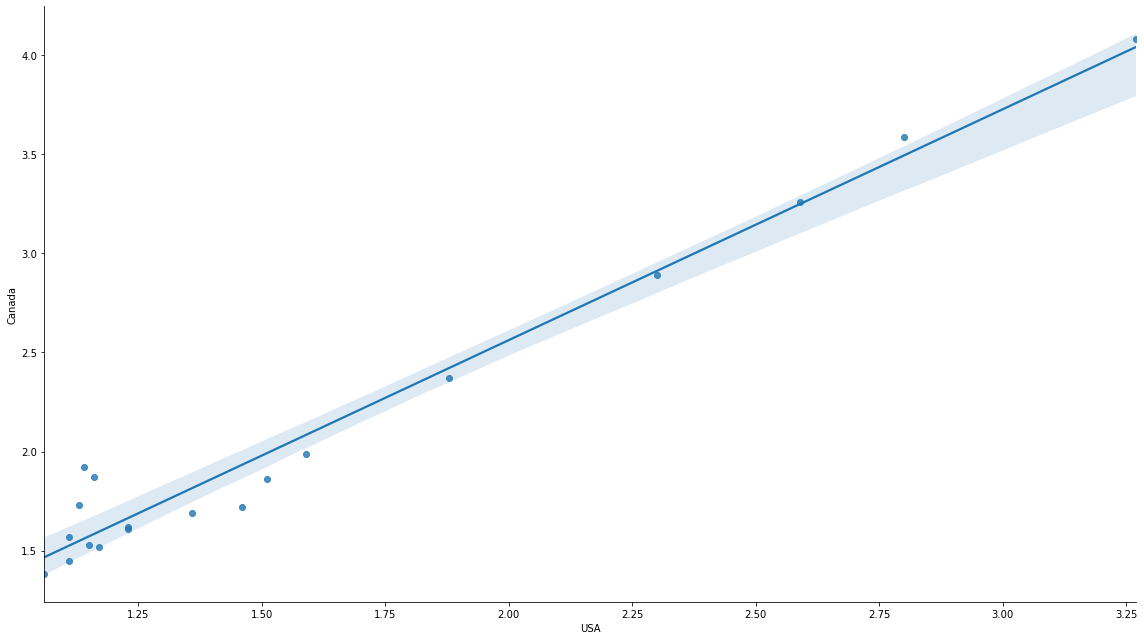

In [4]:
sns.lmplot(x='USA', y='Canada', data=gas_prices, height=9, aspect=16/9)
plt.show()

### Least Squares Regression (Ordinary Least Squares)
How is the linear regression line fitted?

The regression line is the estimate that minimizes the the sum of squared residual values, also called *residual sum of squares* or RSS.

$$
    RSS = \sum_{i=1}^{n}(y_i-\hat{y}_i)^2 = \sum_{i=1}^{n}(y_i-\hat{b}_0-\hat{b}_1x_i)^2
$$

The estimates $\hat{b}_0$ and $\hat{b}_1$ are the values that minimize RSS.

The formulas to calculate the coefficients are:
$$
    \hat{b}_0 = \frac{\sum_{i=1}^{n}(y_i-\bar{y})(x_i-\bar{x})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}
$$

$$
    \hat{b}_1 = \bar{y}-\hat{b}_1\bar{x}
$$

In [5]:
# Calculating a linear regression
x = gas_prices['USA'].values.reshape(-1, 1)
y = gas_prices['Canada'].values.reshape(-1, 1)

reg = LinearRegression().fit(x, y)

In [6]:
print('Y int., b0: {0}'.format(reg.intercept_[0]))
print('Coeff. regression, b1: {0}'.format(reg.coef_[0][0]))

Y int., b0: 0.23083496573940665
Coeff. regression, b1: 1.16575655044467


In [7]:
y_predict = reg.predict(x)
y_predict

array([[1.58311256],
       [1.55979743],
       [1.54813987],
       [1.52482474],
       [1.52482474],
       [1.571455  ],
       [1.66471552],
       [1.66471552],
       [1.46653691],
       [1.59477013],
       [1.99112736],
       [1.93283953],
       [1.81626387],
       [2.08438788],
       [2.42245728],
       [2.91207503],
       [3.25014443],
       [3.49495331],
       [4.04285889]])

## Coefficient of Determination
A measurement in the proportion of $x$ in predicting $y$.
### R-squared
How well does a change in $x$ explain a change in $y$? How strong is the relationship between two variables?

R-squared is calculated by:

$$
    r^2 = 1-\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y}_i)^2}
$$

### R-squared Explained

Defining r-squared with sum of squares as:  

$$  
    r^2 = \frac{SSTot-SSRes}{SSTot} = 1-\frac{SSRes}{SSTot}
$$

Total sample variation around mean  
$$  
    SSTot = SS_{yy} = \sum_{i=1}^{n}(y_i-\bar{y})^2
$$

Unexplained sample variability after fitting  

$$  
    SSReg = \sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2
$$

Explained sample variability attributable to the linear relationship

$$  
    SSRes = SSE = \sum_{i=1}^{n}(y_i-\hat{y})^2
$$

Proportion of total sample variability explained by the linear relationship  

$$
    \frac{SSTot-SSRes}{SSTot} = \frac{SS_{yy}-SSE}{SS_{yy}} = \frac{SSReg}{SSTot}
$$

### Adjusted R-squared
Better measurement that takes into account, because:
1. Number of samples.
1. Penalizes data points that don't fit the model.
1. Adjusted R-squared only improves by adding relevant data points (not just throwing extra data at the problem).

$$
    R_{adj}^{2} = 1-\left[\frac{(1-R^2)(n-1)}{n-k-1}\right]
$$

where,  
$n$: number of samples  
$k$: independent variables (penalty)

Although, the difference to R-squared becomes insignificant when working with large datasets.

In [8]:
#R2 Score
reg.score(x, y)

0.9664520990509683

## Mean Absolute Error
Measures errors between paired observations expressing the same phenomenon (independent variable and dependent variable).

$$
    MAE = \frac{\sum_{i=1}^{n}|y_i-x_i|}{n} = \frac{\sum_{i=1}^{n}|e_i|}{n}
$$

In [9]:
mean_absolute_error(y_true=y, y_pred=y_predict)

0.10696513410047437

## Root Mean Squared Error
Measures the overall accuracy of a regression model, and is the basis for comparing it to other models.

$$
    RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}}
$$

In [10]:
np.sqrt(mean_squared_error(y_true=y, y_pred=y_predict))

0.14023479640380665

## Residual Standard Error
Similar to $RMSE$, with degrees of freedom under the denominator. In practice, the difference between $RMSE$ and $RSE$ is small with large datasets.

$$
    RSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{(n-p-1)}}
$$

Where,  
$p$: # of predictor variables

## Residual Standard Error

In [11]:
# RSE is not built into sklearn.metrics
np.sqrt(np.sum((y - y_predict)**2) / (len(y) - 2))

0.14825458317008874

## Residuals
Residuals are the differences between the observed and estimated values in a regression. Computed by,

$$
    \hat{e}_i = y_i - \hat{y}_i
$$

### Residuals Plot

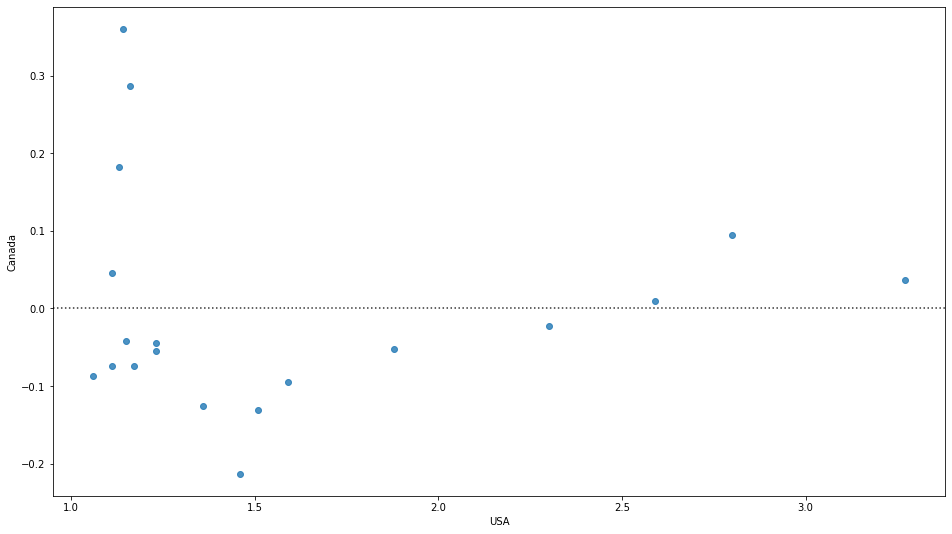

In [12]:
plt.figure(figsize=(16,9))
sns.residplot(x='USA', y='Canada', data=gas_prices)
plt.show()

## Transformation

## Standardization

## Outliers, Leverage & Influence

## Multiple Linear Regression
*MLE* is used to extend a linear regression model to multiple predictors.

$$
    y = b_0+b_1x_1 + b_2x_2 + ... + b_px_p + e
$$